# Visualizing Text Data

### What Makes Visualizing Text Data Different?


In [12]:
import pandas as pd

df = pd.read_csv('assets/European Restaurant Reviews.csv')

print(df.head())

df['Sentiment'].value_counts()

  Country            Restaurant Name Sentiment  \
0  France  The Frog at Bercy Village  Negative   
1  France  The Frog at Bercy Village  Negative   
2  France  The Frog at Bercy Village  Negative   
3  France  The Frog at Bercy Village  Negative   
4  France  The Frog at Bercy Village  Negative   

                                Review Title Review Date  \
0                               Rude manager  May 2024 •   
1                       A big disappointment  Feb 2024 •   
2               Pretty Place with Bland Food  Nov 2023 •   
3   Great service and wine but inedible food  Mar 2023 •   
4  Avoid- Worst meal in Rome - possibly ever  Nov 2022 •   

                                              Review  
0  The manager became agressive when I said the c...  
1  I ordered a beef fillet ask to be done medium,...  
2  This is an attractive venue with welcoming, al...  
3  Sadly I  used the high TripAdvisor rating too ...  
4  From the start this meal was bad- especially g...  


Positive    1237
Negative     265
Name: Sentiment, dtype: int64

### What are some relationships we might try to visualize using this data?

Positive Review Titles


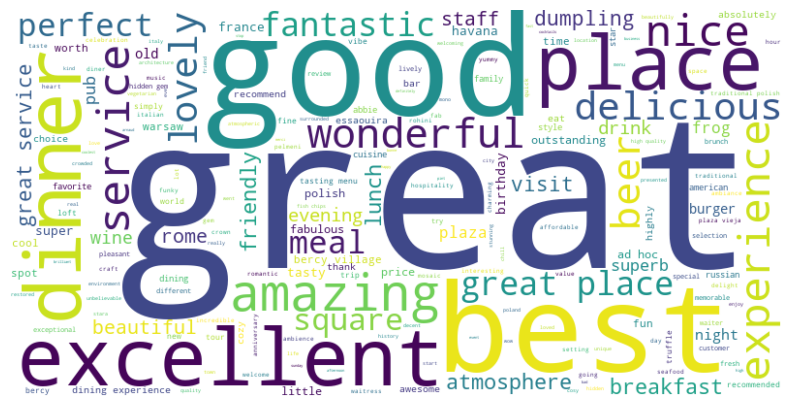

Negative Review Titles


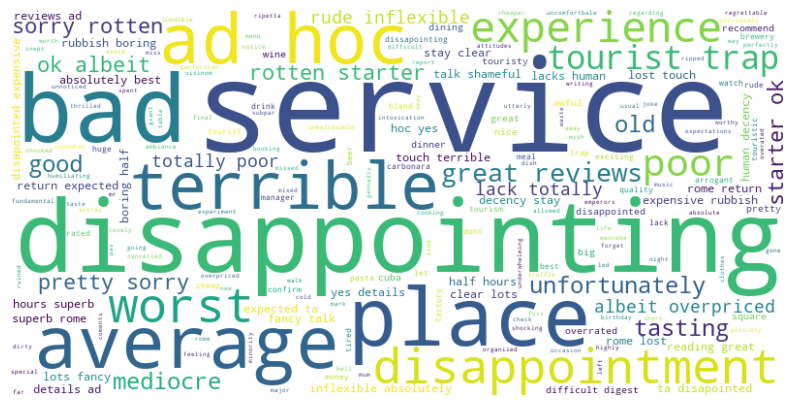

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

# Define additional stopwords to remove
additional_stopwords = {'food', 'restaurant'}

# Separate positive and negative reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['Review Title'].astype(str))
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['Review Title'].astype(str))

# Tokenize the words
postive_words = positive_reviews.lower().split()
    
# Remove punctuation and stopwords (including additional stopwords)
postive_words = [word.strip(string.punctuation) for word in postive_words if word.isalnum() and word not in sklearn_stop_words and word not in additional_stopwords]
    
# Generate the word cloud
print('Positive Review Titles')
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(postive_words))
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Negative reviews
negative_words = negative_reviews.lower().split()
    
# Remove punctuation and stopwords (including additional stopwords)
negative_words = [word.strip(string.punctuation) for word in negative_words if word.isalnum() and word not in sklearn_stop_words and word not in additional_stopwords]
    
# Generate the word cloud
print('Negative Review Titles')
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(negative_words))
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


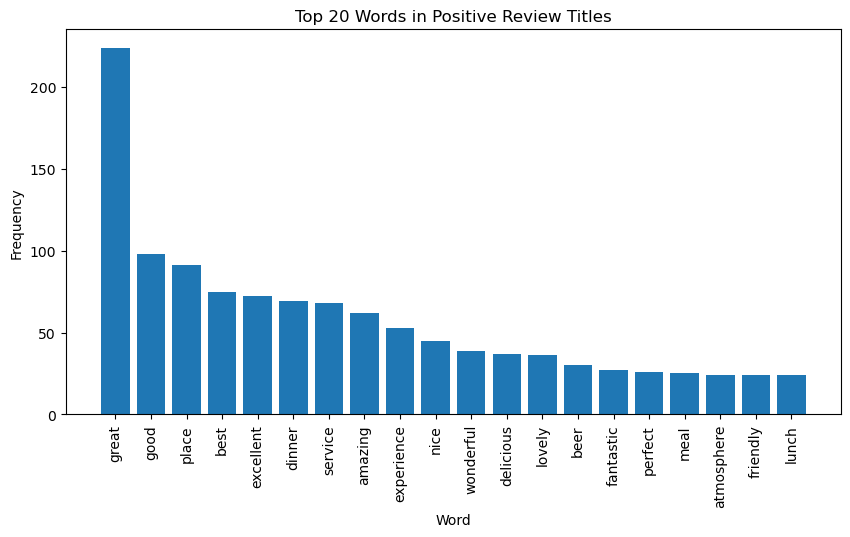

In [14]:
positive_word_freq = Counter(postive_words)
positive_common_words = positive_word_freq.most_common(20)
    
# Convert to DataFrame for plotting
positive_freq_df = pd.DataFrame(positive_common_words, columns=['Word', 'Frequency'])
    
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(positive_freq_df['Word'], positive_freq_df['Frequency'])
ax.set_title(f'Top 20 Words in Positive Review Titles')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

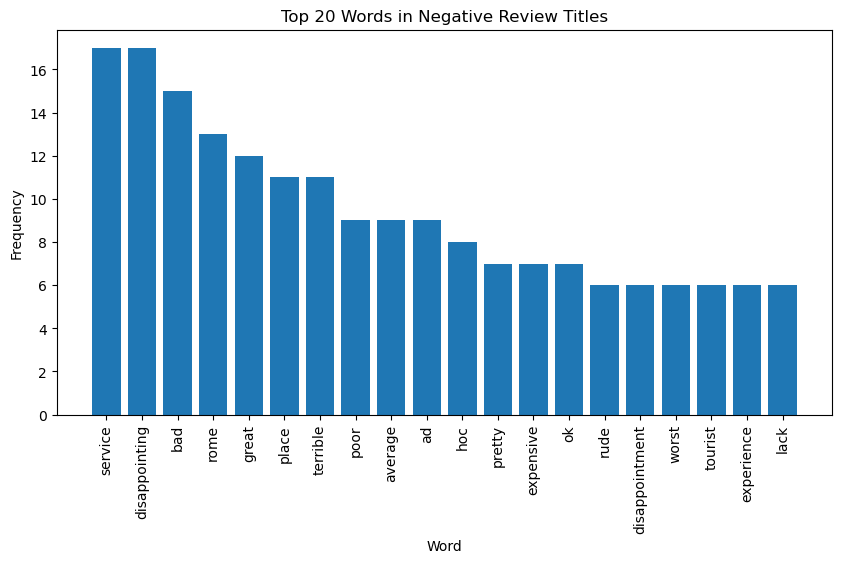

In [15]:
negative_word_freq = Counter(negative_words)
negative_common_words = negative_word_freq.most_common(20)
    
# Convert to DataFrame for plotting
negative_freq_df = pd.DataFrame(negative_common_words, columns=['Word', 'Frequency'])
    
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(negative_freq_df['Word'], negative_freq_df['Frequency'])
ax.set_title(f'Top 20 Words in Negative Review Titles')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## Sentiment

Another way to look at the data is to see how different words factor into the overall sentiment of a review.  There are different ways to do this, but one way is by using the textblob library (Python has tons of NLP libraries) to compute the sentiment of each review.  Sentiment can be positive (a positive value), negative (a negative value) or neutral (a value at or near 0).  

Interestingly, the sentiment calculated by textblob doesn't align perfectly (though it does generally match up) with the positive/negative label given in the data.  

Let's look at the sentiment vs subjectivity color coded by the sentiment label in the dataset.


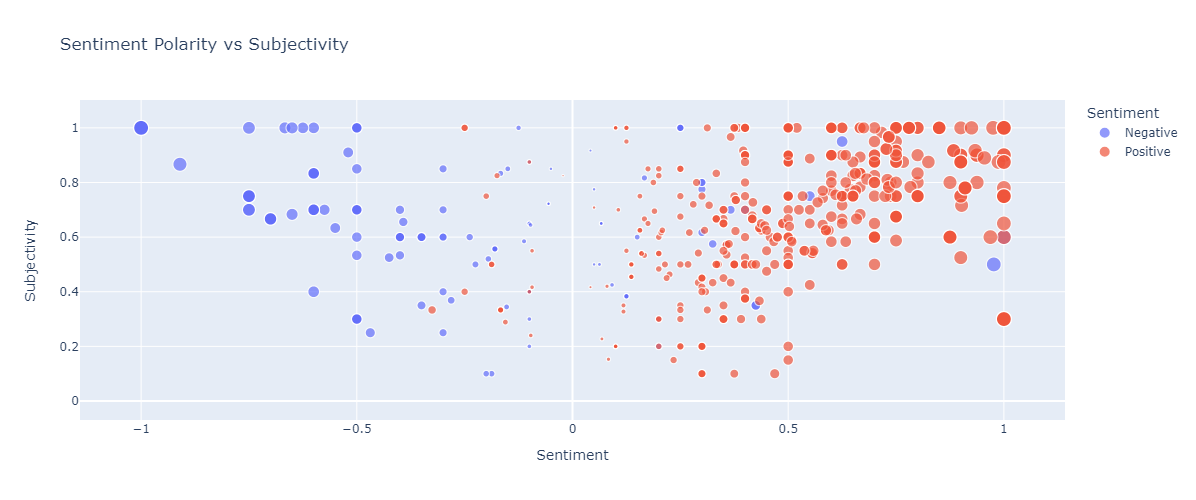

In [16]:
#%pip install textblob
from textblob import TextBlob
import plotly.express as px

df['calc_sentiment'] = df['Review Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['Review Title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

df['abs_sentiment'] = df['calc_sentiment'].abs()

fig = px.scatter(df, x='calc_sentiment', y='subjectivity', 
                 hover_data=['Review Title'],
                 color='Sentiment',
                 size='abs_sentiment',
                 size_max = 15,
                 title='Sentiment Polarity vs Subjectivity',
                 hover_name = 'Restaurant Name',
                 labels={'sentiment': 'Sentiment Polarity', 'subjectivity': 'Subjectivity'})

fig.update_layout(xaxis_title = 'Sentiment', height=500)
fig.show()


Now lets color code by restaruant.


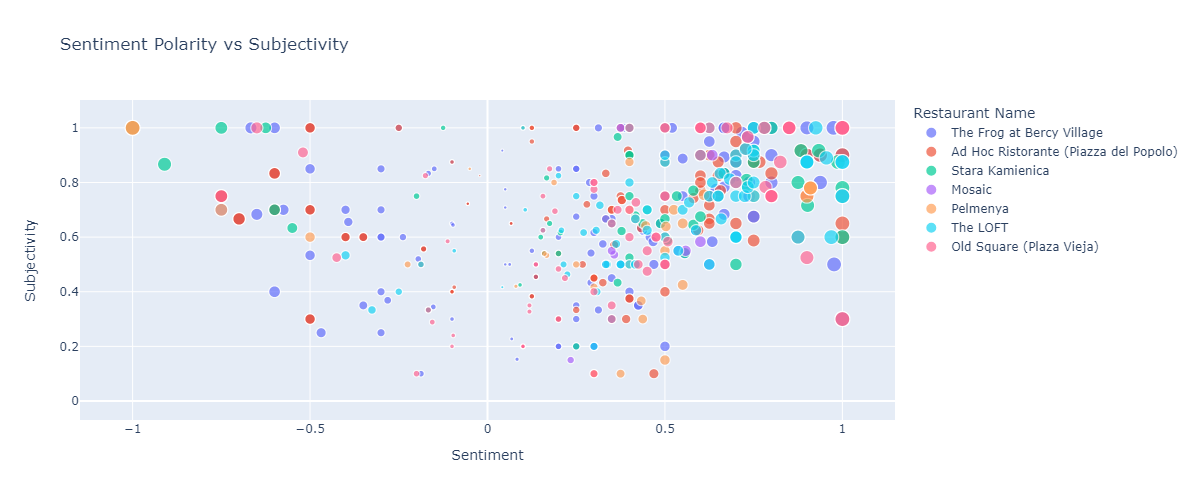

In [17]:
fig = px.scatter(df, x='calc_sentiment', y='subjectivity', 
                 hover_data=['Review Title'],
                 color='Restaurant Name',
                 size='abs_sentiment',
                 size_max = 15,
                 title='Sentiment Polarity vs Subjectivity',
                 hover_name = 'Restaurant Name',
                 labels={'sentiment': 'Sentiment Polarity', 'subjectivity': 'Subjectivity'})

fig.update_layout(xaxis_title = 'Sentiment', height=500)
fig.show()

How positive or negative are different words in reviews percieved?

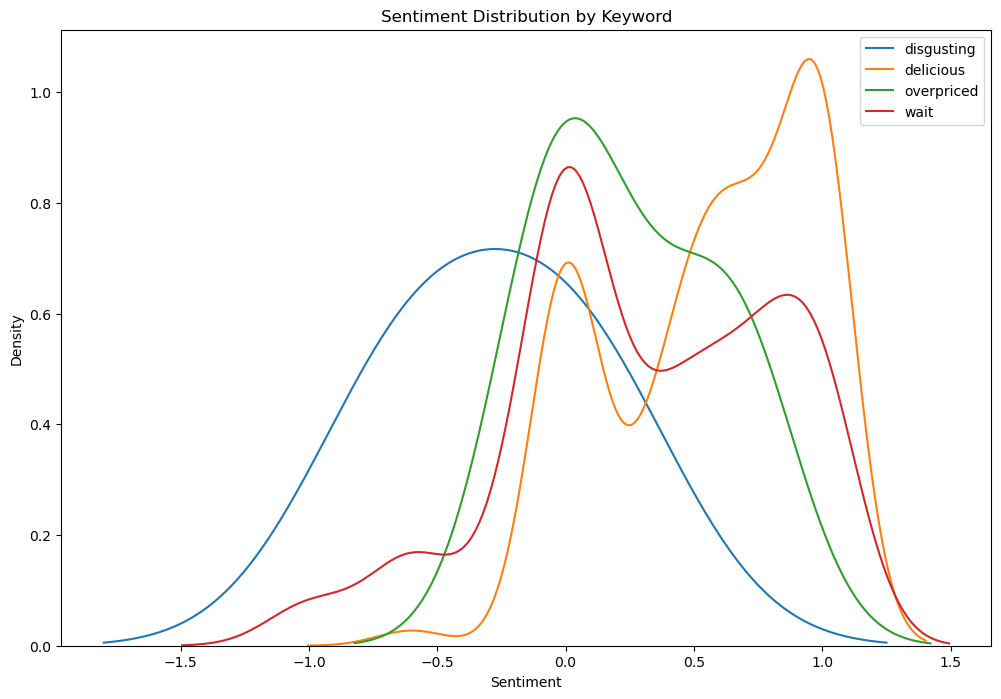

In [18]:
import seaborn as sns

keywords = ["disgusting", "delicious", "overpriced", "wait"]

# Filter reviews based on the presence of keywords and compute sentiment for each keyword
sentiments = {}
for keyword in keywords:
    sentiments[keyword] = df[df['Review'].str.contains(keyword, case=False, na=False)]['calc_sentiment']

# Plot
plt.figure(figsize=(12, 8))
for keyword, sentiment in sentiments.items():
    sns.kdeplot(sentiment, label=keyword)
    
plt.title('Sentiment Distribution by Keyword')
plt.xlabel('Sentiment')
plt.legend()

Can we determine something about the sentiment based on the review length?

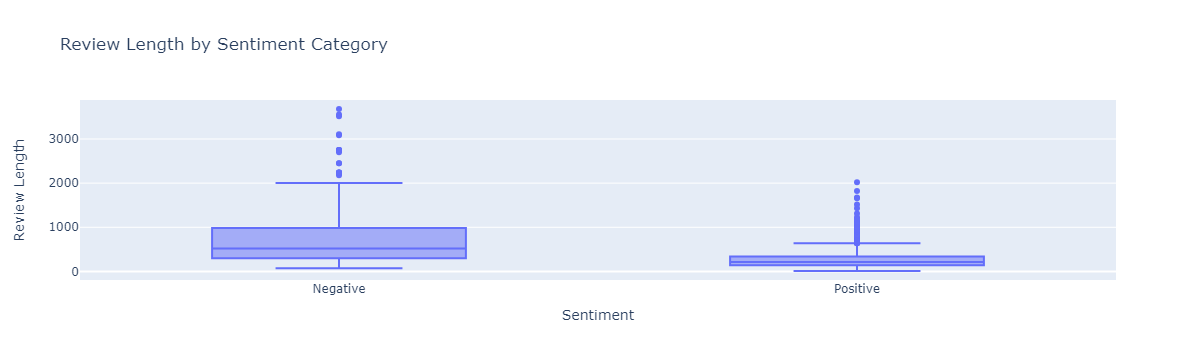

In [19]:
df['review_length'] = df['Review'].str.len()


# Create the box plot
fig = px.box(df, x='Sentiment', y='review_length', title='Review Length by Sentiment Category',
             labels={'review_length': 'Review Length'})

# Show the plot
fig.show()

What about reviews over time?

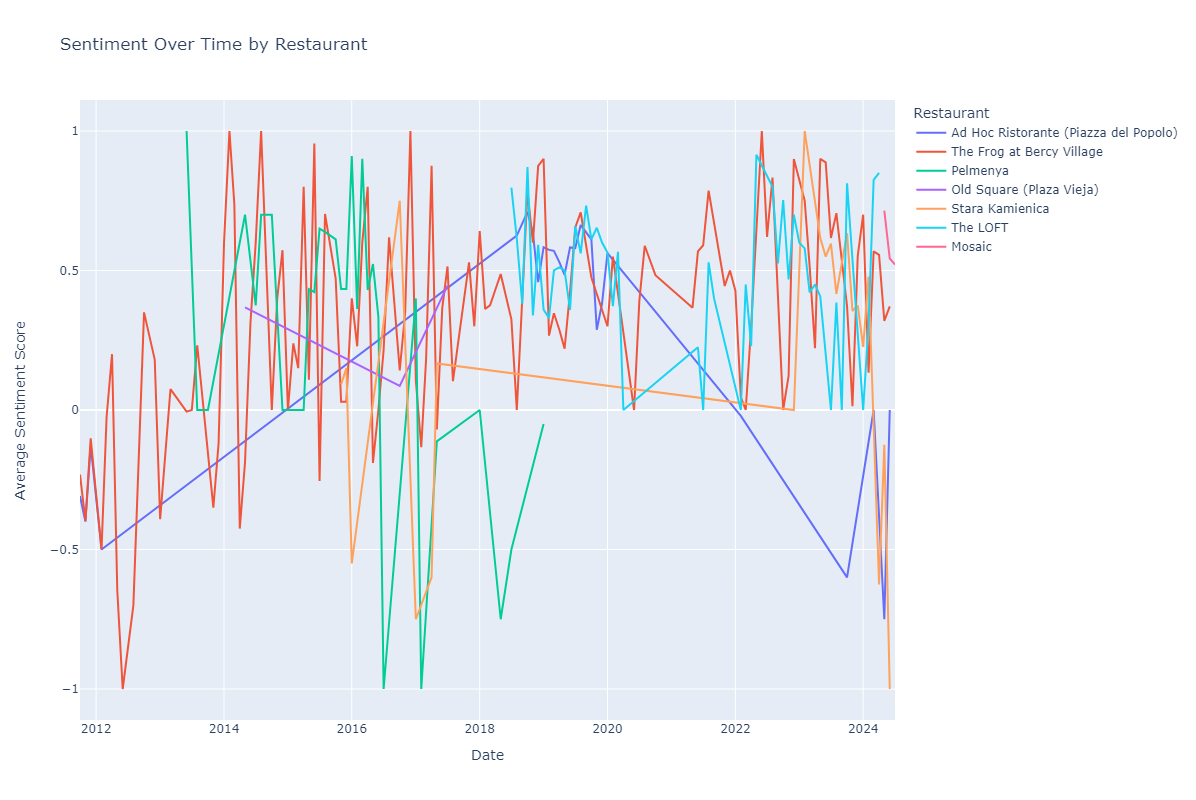

In [21]:
import re

# Remove letters and numbers but not spaces
df['Review Date'] = df['Review Date'].astype(str).apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x).strip())
df['Review Date_DT'] = pd.to_datetime(df['Review Date'], format='%b %Y', errors='coerce')

# Aggregate by date and restaurant to get average sentiment scores
aggregated_data = df.groupby(['Restaurant Name', 'Review Date_DT'])['calc_sentiment'].mean().reset_index()

aggregated_data.sort_values(by='Review Date_DT', inplace=True)

# Create a line plot with one line per restaurant
fig = px.line(aggregated_data, x='Review Date_DT', y='calc_sentiment', color='Restaurant Name', title='Sentiment Over Time by Restaurant')

# Update the layout to increase the figure size and set axis titles
fig.update_layout(
    width=1200,
    height=800,
    xaxis_title='Date',
    yaxis_title='Average Sentiment Score',
    legend_title='Restaurant'
)

fig.show()

Is this a good graph?  How could we better communicate this data?

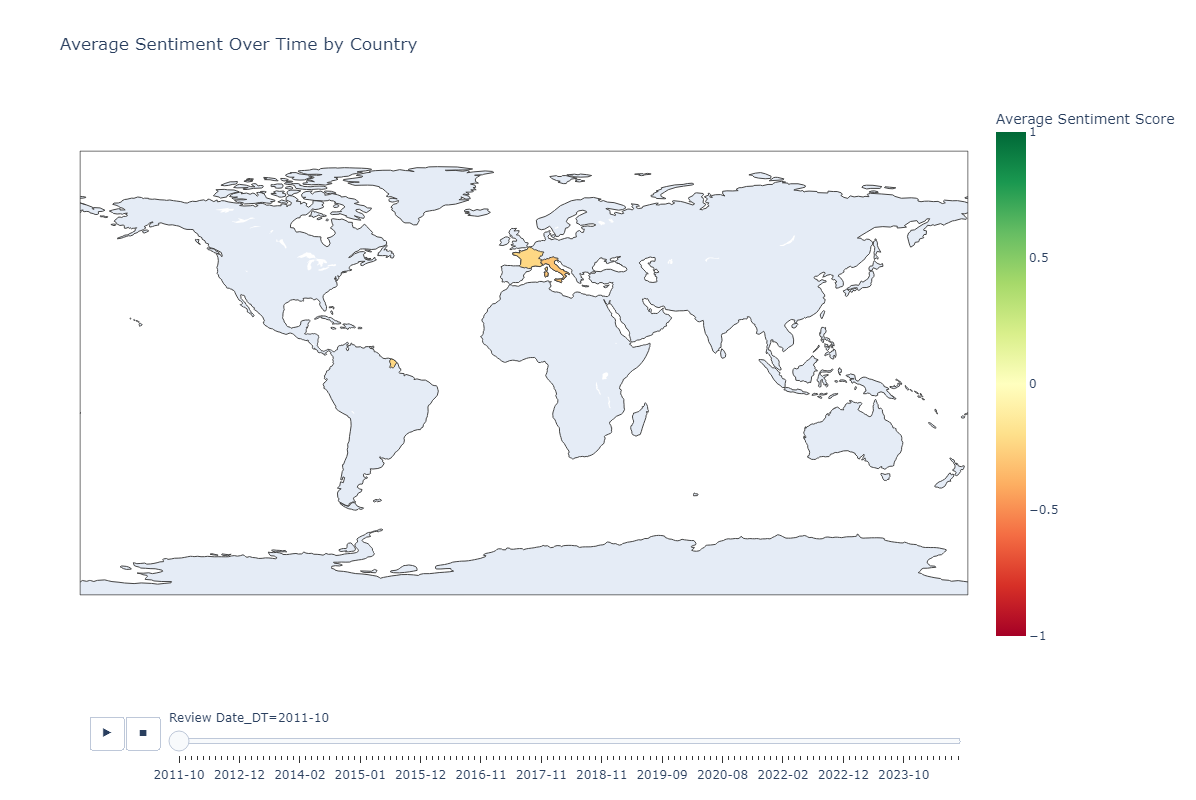

In [22]:
#Choropleth plot

# Aggregate by country and date to get average sentiment scores
aggregated_data = df.groupby(['Country', 'Review Date_DT'])['calc_sentiment'].mean().reset_index()

# Convert 'Review Date_DT' to string format for animation
aggregated_data['Review Date_DT'] = aggregated_data['Review Date_DT'].dt.strftime('%Y-%m')

aggregated_data.sort_values(by='Review Date_DT', inplace=True)

# Create an animated choropleth chart
fig = px.choropleth(aggregated_data, 
                    locations='Country', 
                    locationmode='country names', 
                    color='calc_sentiment', 
                    hover_name='Country', 
                    animation_frame='Review Date_DT', 
                    color_continuous_scale='RdYlGn', 
                    range_color=(-1, 1),
                    title='Average Sentiment Over Time by Country')

# Update the layout to increase the figure size and set axis titles
fig.update_layout(
    width=1200,
    height=800,
    coloraxis_colorbar=dict(title='Average Sentiment Score')
)

fig.show()